# **DSL 23-2 기초과제 1**
### 기수 : 10기
### 이름 : 박성원

In [3]:
## 코랩에서 작성할 경우
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **3-2.**
신촌 연세로를 지나는 버스 노선의 이용객 수가 ‘차 없는 거리 해제(2022.10.09.)’ 이후 유의미하게 증가했는지 파악하기 위해, 우선 2022년 9월의 평균 이용객 수와 2022년 11월의 평균 이용객 수가 유의미한 차이를 보이는지 통계적 검정을 수행하려고 합니다.

**(a) ✎ 귀무가설과 대립가설을 설정하시오.**

*정답:* <br>
귀무가설 : 9월의 평균 이용객 수 - 11월의 평균 이용객 수 = 0
<br>
대립가설 : 9월의 평균 이용객 수 - 11월의 평균 이용객 수 =/= 0

**(b) ⓒ 파이썬 scipy의 stats 패키지를 활용하여 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### 아래 과정은 전처리 과정입니다. 파일경로만 알맞게 지정해서 실행만 잘 해주시면 데이터프레임이 생성됩니다.

In [5]:
B2212 = pd.read_csv('/content/drive/MyDrive/학회/정규세션/BUS_STATION_BOARDING_MONTH_202212.csv', encoding = 'cp949')
B2211 = pd.read_csv('/content/drive/MyDrive/학회/정규세션/BUS_STATION_BOARDING_MONTH_202211.csv', encoding = 'cp949')
B2210 = pd.read_csv('/content/drive/MyDrive/학회/정규세션/BUS_STATION_BOARDING_MONTH_202210.csv', encoding = 'cp949')
B2209 = pd.read_csv('/content/drive/MyDrive/학회/정규세션/BUS_STATION_BOARDING_MONTH_202209.csv', encoding = 'cp949')
B2208 = pd.read_csv('/content/drive/MyDrive/학회/정규세션/BUS_STATION_BOARDING_MONTH_202208.csv', encoding = 'cp949')
B2207 = pd.read_csv('/content/drive/MyDrive/학회/정규세션/BUS_STATION_BOARDING_MONTH_202207.csv', encoding = 'cp949')

In [6]:
# 13145 정류장(타코벨 앞) 데이터프레임 만드는 함수
def DF13145(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13145']
  return tt

dflist_13145 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024', '서대문03', '서대문04', '서대문05']:
    dflist_13145.append(DF13145(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [7]:
# 13146 정류장(유플렉스 앞) 데이터프레임 만드는 함수
def DF13146(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13146']
  return tt

dflist_13146 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['7720', '7727', '7728', '72', '75']:
    dflist_13146.append(DF13146(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [8]:
# 13324 정류장(playground 앞) 데이터프레임 만드는 함수
def DF13324(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13324']
  return tt

dflist_13324 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024']:
    dflist_13324.append(DF13324(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

사용일자를 datetime 패키지 사용해서 요일 입력 후, 금~일 제외해서(차 없는 거리 : 금요일 오후 2시부터 일요일 자정까지) df 새로 생성

In [9]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [10]:
#13145 정류장 정리

for k in range(0,len(dflist_13145)):
  date = []
  for i in range(0,len(dflist_13145[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13145[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13145[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13145[k] = dflist_13145[k][(dflist_13145[k]['요일']!='Fri')&(dflist_13145[k]['요일']!='Sat')&(dflist_13145[k]['요일']!='Sun')]

In [11]:
#13146 정류장 정리

for k in range(0,len(dflist_13146)):
  date = []
  for i in range(0,len(dflist_13146[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13146[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13146[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13146[k] = dflist_13146[k][(dflist_13146[k]['요일']!='Fri')&(dflist_13146[k]['요일']!='Sat')&(dflist_13146[k]['요일']!='Sun')]

In [12]:
#13324 정류장 정리

for k in range(0,len(dflist_13324)):
  date = []
  for i in range(0,len(dflist_13324[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13324[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13324[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13324[k] = dflist_13324[k][(dflist_13324[k]['요일']!='Fri')&(dflist_13324[k]['요일']!='Sat')&(dflist_13324[k]['요일']!='Sun')]

In [13]:
# 데이터프레임 모아서 만들기 - 13145
Data_13145_171 = pd.concat([dflist_13145[0],dflist_13145[10],dflist_13145[20],dflist_13145[30],dflist_13145[40],dflist_13145[50]])
Data_13145_172 = pd.concat([dflist_13145[1],dflist_13145[11],dflist_13145[21],dflist_13145[31],dflist_13145[41],dflist_13145[51]])
Data_13145_173 = pd.concat([dflist_13145[2],dflist_13145[12],dflist_13145[22],dflist_13145[32],dflist_13145[42],dflist_13145[52]])
Data_13145_472 = pd.concat([dflist_13145[3],dflist_13145[13],dflist_13145[23],dflist_13145[33],dflist_13145[43],dflist_13145[53]])
Data_13145_674 = pd.concat([dflist_13145[4],dflist_13145[14],dflist_13145[24],dflist_13145[34],dflist_13145[44],dflist_13145[54]])
Data_13145_700 = pd.concat([dflist_13145[5],dflist_13145[15],dflist_13145[25],dflist_13145[35],dflist_13145[45],dflist_13145[55]])
Data_13145_7024 = pd.concat([dflist_13145[6],dflist_13145[16],dflist_13145[26],dflist_13145[36],dflist_13145[46],dflist_13145[56]])
Data_13145_S03 = pd.concat([dflist_13145[7],dflist_13145[17],dflist_13145[27],dflist_13145[37],dflist_13145[47],dflist_13145[57]])
Data_13145_S04 = pd.concat([dflist_13145[8],dflist_13145[18],dflist_13145[28],dflist_13145[38],dflist_13145[48],dflist_13145[58]])
Data_13145_S05 = pd.concat([dflist_13145[9],dflist_13145[19],dflist_13145[29],dflist_13145[39],dflist_13145[49],dflist_13145[59]])

In [14]:
# 데이터프레임 모아서 만들기 - 13146
Data_13146_7720 = pd.concat([dflist_13146[0],dflist_13146[5],dflist_13146[10],dflist_13146[15],dflist_13146[20],dflist_13146[25]])
Data_13146_7727 = pd.concat([dflist_13146[1],dflist_13146[6],dflist_13146[11],dflist_13146[16],dflist_13146[21],dflist_13146[26]])
Data_13146_7728 = pd.concat([dflist_13146[2],dflist_13146[7],dflist_13146[12],dflist_13146[17],dflist_13146[22],dflist_13146[27]])
Data_13146_72 = pd.concat([dflist_13146[3],dflist_13146[8],dflist_13146[13],dflist_13146[18],dflist_13146[23],dflist_13146[28]])
Data_13146_75 = pd.concat([dflist_13146[4],dflist_13146[9],dflist_13146[14],dflist_13146[19],dflist_13146[24],dflist_13146[29]])

In [15]:
# 데이터프레임 모아서 만들기 - 13324
Data_13324_171 = pd.concat([dflist_13324[0],dflist_13324[7],dflist_13324[14],dflist_13324[21],dflist_13324[28],dflist_13324[35]])
Data_13324_172 = pd.concat([dflist_13324[1],dflist_13324[8],dflist_13324[15],dflist_13324[22],dflist_13324[29],dflist_13324[36]])
Data_13324_173 = pd.concat([dflist_13324[2],dflist_13324[9],dflist_13324[16],dflist_13324[23],dflist_13324[30],dflist_13324[37]])
Data_13324_472 = pd.concat([dflist_13324[3],dflist_13324[10],dflist_13324[17],dflist_13324[24],dflist_13324[31],dflist_13324[38]])
Data_13324_674 = pd.concat([dflist_13324[4],dflist_13324[11],dflist_13324[18],dflist_13324[25],dflist_13324[32],dflist_13324[39]])
Data_13324_700 = pd.concat([dflist_13324[5],dflist_13324[12],dflist_13324[19],dflist_13324[26],dflist_13324[33],dflist_13324[40]])
Data_13324_7024 = pd.concat([dflist_13324[6],dflist_13324[13],dflist_13324[20],dflist_13324[27],dflist_13324[34],dflist_13324[41]])

In [16]:
Data_13145_S03

,요일,사용일자,노선번호,버스정류장ARS번호,승차총승객수,하차총승객수
143555,Mon,20220704,서대문03,13145,609,299
183199,Tue,20220705,서대문03,13145,620,269
222880,Wed,20220706,서대문03,13145,628,246
262331,Thu,20220707,서대문03,13145,582,225
420400,Mon,20220711,서대문03,13145,511,224
...,...,...,...,...,...,...
872132,Thu,20221222,서대문03,13145,702,263
1032129,Mon,20221226,서대문03,13145,637,246
1072463,Tue,20221227,서대문03,13145,632,241
1112864,Wed,20221228,서대문03,13145,679,233


### t검정

#### 13145 정류장

In [17]:
dflist_13145

[          요일      사용일자 노선번호 버스정류장ARS번호  승차총승객수  하차총승객수
 121870   Mon  20220704  171      13145     156      77
 161528   Tue  20220705  171      13145     167      93
 201148   Wed  20220706  171      13145     166      91
 240753   Thu  20220707  171      13145     175      92
 398794   Mon  20220711  171      13145     158      65
 438423   Tue  20220712  171      13145     147      90
 478081   Wed  20220713  171      13145     123      84
 517767   Thu  20220714  171      13145     155      72
 675739   Mon  20220718  171      13145     148      59
 715393   Tue  20220719  171      13145     180      81
 755039   Wed  20220720  171      13145     144      81
 794643   Thu  20220721  171      13145     148      77
 952645   Mon  20220725  171      13145     138      67
 992350   Tue  20220726  171      13145     179      66
 1031962  Wed  20220727  171      13145     156      65
 1071617  Thu  20220728  171      13145     147      71,
           요일      사용일자 노선번호 버스정류장ARS번호  승차총승객수

In [18]:
t_13145_takeon = [] # p-value를 저장하는 리스트
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+20]['승차총승객수'],
                                    equal_var=True, alternative='two-sided')
  t_13145_takeon.append(p_value)
t_13145_takeon

[0.01881010392965397,
 0.34633588682650485,
 0.04568806413396468,
 0.0014708061073618898,
 0.5268393407440319,
 0.5927542985688974,
 0.008622248839178434,
 0.012935391169692277,
 0.0426559576552713,
 0.5377397715082548]

In [19]:
t_13145_takeoff = [] # p-value를 저장하는 리스트
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+20]['하차총승객수'],
                                    equal_var=True, alternative='two-sided')
  t_13145_takeoff.append(p_value)
t_13145_takeoff

[0.7051192173165544,
 0.7513771157891325,
 0.7076888292247818,
 0.8561610916192333,
 0.7046993820252708,
 0.9178261557058813,
 0.7733630444924042,
 0.13960019746014066,
 0.6845334818893105,
 0.34962295139969146]

In [20]:
p_value_13145 = pd.DataFrame({'171' : [t_13145_takeon[0], t_13145_takeoff[0]],
                             '172' : [t_13145_takeon[1], t_13145_takeoff[1]],
                             '173' : [t_13145_takeon[2], t_13145_takeoff[2]],
                             '472' : [t_13145_takeon[3], t_13145_takeoff[3]],
                             '674' : [t_13145_takeon[4], t_13145_takeoff[4]],
                             '700' : [t_13145_takeon[5], t_13145_takeoff[5]],
                             '7024' : [t_13145_takeon[6], t_13145_takeoff[6]],
                             'S03' : [t_13145_takeon[7], t_13145_takeoff[7]],
                             'S04' : [t_13145_takeon[8], t_13145_takeoff[8]],
                             'S05' : [t_13145_takeon[9], t_13145_takeoff[9]]},
                              index = ['take-on', 'take-off'])
p_value_13145

,171,172,173,472,674,700,7024,S03,S04,S05
take-on,0.018810,0.346336,0.045688,0.001471,0.526839,0.592754,0.008622,0.012935,0.042656,0.537740
take-off,0.705119,0.751377,0.707689,0.856161,0.704699,0.917826,0.773363,0.139600,0.684533,0.349623


#### 13146 정류장

In [21]:
t_13146_takeon = [] # p-value를 저장하는 리스트
for i in range(10,15):
  t_stat, p_value = stats.ttest_ind(dflist_13146[i]['승차총승객수'], dflist_13145[i+10]['승차총승객수'],
                                    equal_var=True, alternative='two-sided')
  t_13146_takeon.append(p_value)
t_13146_takeon

[1.704023020413957e-21, 1.3593886318809916e-16, 9.63573133487036e-19, nan, nan]

In [22]:
t_13146_takeoff = [] # p-value를 저장하는 리스트
for i in range(10,15):
  t_stat, p_value = stats.ttest_ind(dflist_13146[i]['하차총승객수'], dflist_13145[i+10]['하차총승객수'],
                                    equal_var=True, alternative='two-sided')
  t_13146_takeoff.append(p_value)
t_13146_takeoff

[1.6051458313604198e-22,
 1.2626194644182091e-20,
 3.6773182492784916e-17,
 nan,
 nan]

In [23]:
p_value_13146 = pd.DataFrame({'7720' : [t_13146_takeon[0], t_13146_takeoff[0]],
                             '7727' : [t_13146_takeon[1], t_13146_takeoff[1]],
                             '7728' : [t_13146_takeon[2], t_13146_takeoff[2]]},
                              index = ['take-on', 'take-off'])
p_value_13146

,7720,7727,7728
take-on,1.704023e-21,1.359389e-16,9.635731e-19
take-off,1.605146e-22,1.262619e-20,3.677318e-17


#### 13324 정류장

In [24]:
t_13324_takeon = [] # p-value를 저장하는 리스트
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+14]['승차총승객수'],
                                    equal_var=True, alternative='two-sided')
  t_13324_takeon.append(p_value)
t_13324_takeon

[1.9692460844100594e-07,
 4.98357593775814e-14,
 4.062893602222572e-07,
 7.814907435228814e-29,
 4.557910401036132e-12,
 0.8662057176743597,
 1.7202026253450545e-10]

In [25]:
t_13324_takeoff = [] # p-value를 저장하는 리스트
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+14]['하차총승객수'],
                                    equal_var=True, alternative='two-sided')
  t_13324_takeoff.append(p_value)
t_13324_takeoff

[6.150703895701352e-08,
 3.028421068388545e-21,
 8.31736009672236e-18,
 3.846114735830969e-17,
 1.114175242815817e-16,
 0.07701235037017375,
 1.9580472638221715e-15]

In [26]:
p_value_13324 = pd.DataFrame({'171' : [t_13324_takeon[0], t_13324_takeoff[0]],
                             '172' : [t_13324_takeon[1], t_13324_takeoff[1]],
                             '173' : [t_13324_takeon[2], t_13324_takeoff[2]],
                             '472' : [t_13324_takeon[3], t_13324_takeoff[3]],
                             '674' : [t_13324_takeon[4], t_13324_takeoff[4]],
                              '700' : [t_13324_takeon[5], t_13324_takeoff[5]],
                              '7024' : [t_13324_takeon[6], t_13324_takeoff[6]]},
                              index = ['take-on', 'take-off'])
p_value_13324

,171,172,173,472,674,700,7024
take-on,1.969246e-07,4.983576e-14,4.062894e-07,7.814907e-29,4.557910e-12,0.866206,1.720203e-10
take-off,6.150704e-08,3.028421e-21,8.317360e-18,3.846115e-17,1.114175e-16,0.077012,1.958047e-15


[13145]

171, 172, 173, 472, 7024, S03, S04 : 승차에는 유의미한 증감이 있었으나 하차에는 유의미한 증감이 없었다.

674, 700, S05: 승, 하차 모두 유의미한 증감이 없었다.

 하차를 기준으로 했을 때, 9월의 이용객 수와 11월의 이용객 수에는 대체로 유의미한 변화가 없다.

[13146]

모두 유의미한 증감이 있었다.

9월의 이용객 수와 11월의 이용객 수에는 대체로 유의미한 변화가 있다.

[13324]


700: 승차에는 유의미한 증감이 없었으나 하차에는 있었다.


그외: 모두 유의미한 증감이 있었다.

 하차를 기준으로 했을 때, 9월의 이용객 수와 11월의 이용객 수에는 대체로 유의미한 변화가 있다.

## **4-1.**
(통계학입문(3판) 541쪽 15번 변형) 토플(TOEFL) 점수로 토익(TOEIC) 점수를 예측할 수 있는지 검증해보려고 합니다. 토플과 토익은 미국 교육기업 ETS가 서로 다른 목적으로 개발한 시험이기에 문제 내용과 구성이 다르지만, 두 시험 점수 간의 관련성이 있는 것으로 알려져 있습니다.

**(a)** ⓒ 임의로 선정된 20명의 학생에게 토플과 토익을 모두 치르게 하여 얻은 자료가 있습니다. 파이썬 sklearn.linear_model의 LinearRegression 패키지를 활용하여, 토플 점수로 토익 점수를 예측하는 회귀식을 최소제곱법으로 추정하시오.

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api

In [ ]:
toefl_toeic = pd.read_csv("/content/drive/MyDrive/학회/정규세션/toefl_toeic.dat", encoding='utf-16', sep='\t')
toefl_toeic = toefl_toeic.set_index('student')
toefl_toeic

,TOEFL,TOEIC
student,,
1,83,840
2,80,720
3,67,605
4,97,780
5,104,920
6,57,585
7,65,645
8,89,670
9,96,770


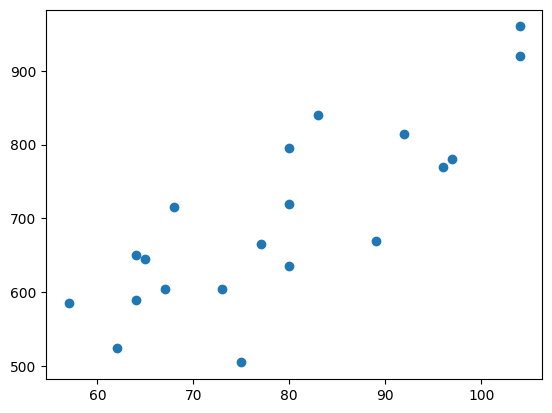

In [ ]:
plt.plot(toefl_toeic["TOEFL"],toefl_toeic["TOEIC"],"o")
plt.show()

In [ ]:
toefl_to_toeic = LinearRegression()
toefl_to_toeic.fit(toefl_toeic["TOEFL"].values.reshape(-1,1), toefl_toeic["TOEIC"])

LinearRegression()

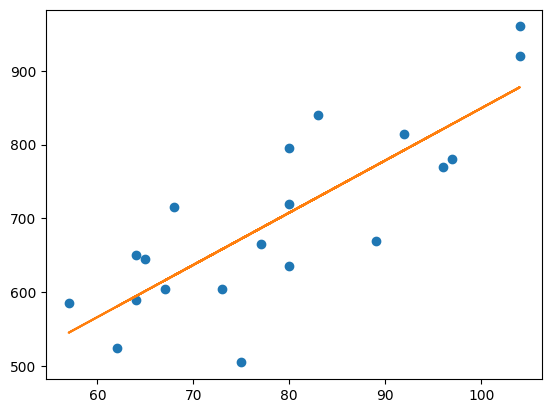

In [ ]:
toefl_to_toeic = LinearRegression()
toefl_to_toeic.fit(toefl_toeic["TOEFL"].values.reshape(-1,1), toefl_toeic["TOEIC"])

plt.plot(toefl_toeic["TOEFL"],toefl_toeic["TOEIC"], 'o')
plt.plot(toefl_toeic["TOEFL"], toefl_to_toeic.predict(toefl_toeic["TOEFL"].values.reshape(-1,1)))
plt.show()

In [ ]:
# 추세선의 기울기와 절편
print(toefl_to_toeic.intercept_,toefl_to_toeic.coef_)

142.31978769068655 [7.06950174]


**(b)** ⓒ 유의수준 5%에서 각 회귀식의 선형성이 있는지 가설검정을 수행하시오.

In [ ]:
mod1 = statsmodels.formula.api.ols('TOEIC ~ TOEFL', data=toefl_toeic)
reg_result1 = mod1.fit()
print(reg_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOEIC   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     35.27
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.28e-05
Time:                        14:58:44   Log-Likelihood:                -113.47
No. Observations:                  20   AIC:                             230.9
Df Residuals:                      18   BIC:                             232.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.3198     95.318      1.493      0.1

## **4-2.**
(통계학입문(3판) 582쪽 19번 변형) 미국 어느 지역의 자동차 판매대수와 광고비, 자동차 전문세일즈맨수, 판매 대리점의 위치 등에 대하여 조사한 자료를 분석하고자 합니다.

ⓒ 파이썬 sklearn.linear_model의 LinearRegression 패키지를 활용하여, Akaike information criterion을 기준으로 아래 모델 중 가장 우수한 모델을 선택하시오.

(코드를 작성해주세요)


In [ ]:
car = pd.read_csv('/content/drive/MyDrive/학회/정규세션/car_sell.dat',encoding='utf-16', sep='\t')
car

,자동차 판매매수,광고시간(분),세일즈맨(명),도시지역,Unnamed: 4,Unnamed: 5
0,127,18,10,Yes,NaN,NaN
1,138,15,25,No,NaN,NaN
2,159,22,14,Yes,NaN,NaN
3,144,23,12,Yes,NaN,NaN
4,139,17,12,No,NaN,NaN
5,128,16,12,Yes,NaN,NaN
6,161,25,14,Yes,NaN,NaN
7,180,26,17,Yes,NaN,NaN
8,102,15,7,No,NaN,NaN
9,163,24,16,Yes,NaN,NaN


In [ ]:
import pandas as pd

# '도시지역' 열을 원핫인코딩하여 더미데이터로 변환
car_encoded = pd.get_dummies(car, columns=['도시지역'], drop_first=True)

# 변환된 데이터프레임 출력
car_encoded


,자동차 판매매수,광고시간(분),세일즈맨(명),Unnamed: 4,Unnamed: 5,도시지역_Yes
0,127,18,10,NaN,NaN,1
1,138,15,25,NaN,NaN,0
2,159,22,14,NaN,NaN,1
3,144,23,12,NaN,NaN,1
4,139,17,12,NaN,NaN,0
5,128,16,12,NaN,NaN,1
6,161,25,14,NaN,NaN,1
7,180,26,17,NaN,NaN,1
8,102,15,7,NaN,NaN,0
9,163,24,16,NaN,NaN,1


In [ ]:
car_encoded.columns

Index(['자동차 판매매수', '광고시간(분)', '세일즈맨(명)', 'Unnamed: 4', 'Unnamed: 5',
       '도시지역_Yes'],
      dtype='object')

In [ ]:
# 데이터 준비
X = car_encoded[['광고시간(분)', '세일즈맨(명)', '도시지역_Yes']]
y = car_encoded['자동차 판매매수']

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 모델 a
X_a = X[['광고시간(분)', '세일즈맨(명)', '도시지역_Yes']]
X_a = sm.add_constant(X_a)
model_a = sm.OLS(y, X_a)
results_a = model_a.fit()
aic_a = results_a.aic

# 모델 b
X_b = X[['광고시간(분)', '세일즈맨(명)']]
X_b = sm.add_constant(X_b)
model_b = sm.OLS(y, X_b)
results_b = model_b.fit()
aic_b = results_b.aic

# 모델 c
X_c = X[['광고시간(분)', '도시지역_Yes']]
X_c = sm.add_constant(X_c)
model_c = sm.OLS(y, X_c)
results_c = model_c.fit()
aic_c = results_c.aic

# 모델 d
X_d = X[['세일즈맨(명)', '도시지역_Yes']]
X_d = sm.add_constant(X_d)
model_d = sm.OLS(y, X_d)
results_d = model_d.fit()
aic_d = results_d.aic

# 모델 e
X_e = X[['광고시간(분)']]
X_e = sm.add_constant(X_e)
model_e = sm.OLS(y, X_e)
results_e = model_e.fit()
aic_e = results_e.aic

# 모델 f
X_f = X[['세일즈맨(명)']]
X_f = sm.add_constant(X_f)
model_f = sm.OLS(y, X_f)
results_f = model_f.fit()
aic_f = results_f.aic

# AIC 값 비교
aic_values = [aic_a, aic_b, aic_c, aic_d, aic_e, aic_f]
models = ['모델 a', '모델 b', '모델 c', '모델 d', '모델 e', '모델 f']
best_model = models[aic_values.index(min(aic_values))]

# 결과 출력
print("AIC values:")
for model, aic in zip(models, aic_values):
    print(f"{model}: {aic}")
print(f"\n가장 성능이 좋은 모델: {best_model}")


AIC values:
모델 a: 91.64064145209734
모델 b: 91.52200938155833
모델 c: 101.52503182295261
모델 d: 100.43474223707223
모델 e: 99.8085334905034
모델 f: 108.81406913476984

가장 성능이 좋은 모델: 모델 b
